THE UNIFORM DISTRIBUTION

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
uniform_data=stats.uniform.rvs(size=10000,loc=0,scale=10)
#GENERRATING 10000 NUMBERS FROM 0 To 10

<AxesSubplot:ylabel='Density'>

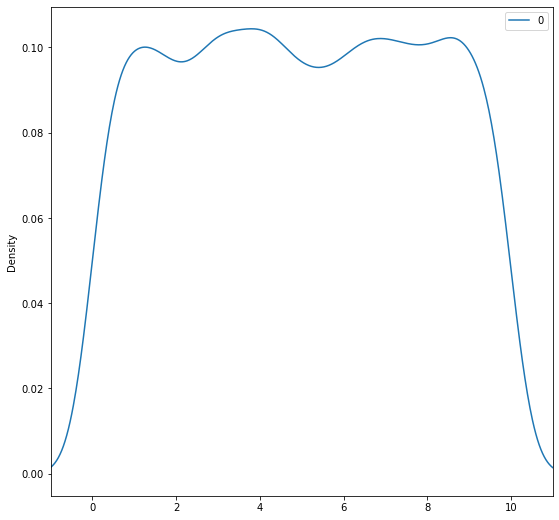

In [3]:
pd.DataFrame(uniform_data).plot(kind="density",figsize=(9,9),xlim=(-1,11))

In [4]:
stats.uniform.cdf(x=2.5,     #Cutoff Value (Quantile) To Check
                  loc=0,     #Distribution Start
                  scale=10)  #Distribution End

0.25

In [5]:
  stats.uniform.ppf(q=0.4,    #Probability Cutoff
                   loc=0,     #Distribution Start
                   scale=10)  #Distribution End

4.0

In [6]:
for x in range(-1,12,3):
    print("Density At x Value " + str(x))
    print(stats.uniform.pdf(x,loc=0,scale=10))

Density At x Value -1
0.0
Density At x Value 2
0.1
Density At x Value 5
0.1
Density At x Value 8
0.1
Density At x Value 11
0.0


GETTING RANDOM NUMBERS AND SETTING THE SEED

In [7]:
import random

In [8]:
random.randint(0,10)   #GET A RANDOM INTEGER IN THE SPECIFIED RANGE

0

In [9]:
random.choice([1,2,3,4,5,6,7,8,9])  #GET A RANDOM ELEMENT FROM THE SEQUENCE

5

In [10]:
random.random()   #GET A REAL NUMBER FROM 0 TO 1

0.4807772998472921

In [11]:
random.uniform(0,10)   #GET A REAL NUMBER IN THE SPECIFIED RANGE

7.626833202969633

In [12]:
random.seed(12)  #SET THE SEED TO AN ARBITRARY VALUE
print([random.uniform(0,10) for x in range(4)])
random.seed(12)  #SET THE SEED TO THE SAME VALUE
print([random.uniform(0,10) for x in range(4)])

[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]
[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]


THE NORMAL DISTRIBUTION

In [13]:
prob_under_minus1=stats.norm.cdf(x=-1,loc=0,scale=1)
prob_over_plus1=1-stats.norm.cdf(x=1,loc=0,scale=1)
between_prob=1-(prob_under_minus1+prob_over_plus1)
print(prob_under_minus1,prob_over_plus1,between_prob)

0.15865525393145707 0.15865525393145707 0.6826894921370859


Text(1.4, 0.03, '0.159')

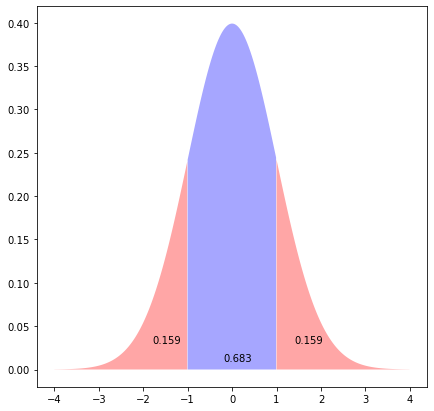

In [17]:
plt.rcParams['figure.figsize']=(7,7)
plt.fill_between(x=np.arange(-4,-1,0.01),
                y1=stats.norm.pdf(np.arange(-4,-1,0.01)),
                facecolor='red',
                alpha=0.35)
plt.fill_between(x=np.arange(1,4,0.01),
                y1=stats.norm.pdf(np.arange(1,4,0.01)),
                facecolor='red',
                alpha=0.35)
plt.fill_between(x=np.arange(-1,1,0.01),
                y1=stats.norm.pdf(np.arange(-1,1,0.01)),
                facecolor='blue',
                alpha=0.35)
plt.text(x=-1.8,y=0.03,s=round(prob_under_minus1,3))
plt.text(x=-0.2,y=0.01,s=round(between_prob,3))
plt.text(x=1.4,y=0.03,s=round(prob_over_plus1,3))

In [19]:
print(stats.norm.ppf(q=0.025))  #FIND THE QUANTILE FOR THE 2.5% CUTOFF
print(stats.norm.ppf(q=0.975))  #FIND THE QUANTILE FOR THE 97.5% CUTOFF

-1.9599639845400545
1.959963984540054


In [20]:
print(stats.norm.cdf(x=-3))  #Find how much data is below -3
print(stats.norm.cdf(x=3))   #Find how much data is above 3

0.0013498980316300933
0.9986501019683699


BINOMIAL DISTRIBUTION

col_0   0   1    2     3     4     5     6     7    8    9   10
row_0                                                          
counts   6  90  443  1190  2086  2412  2036  1189  434  104  10


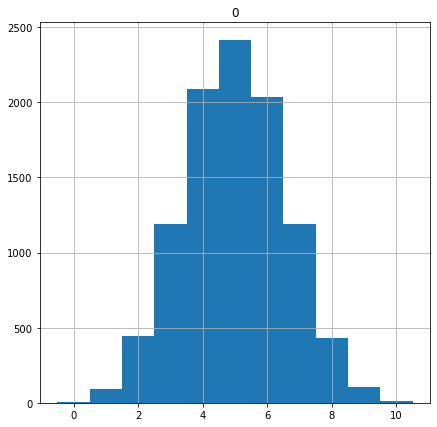

In [23]:
fair_coin_flips=stats.binom.rvs(n=10,        #Number of flips per trial
                                p=0.5,       #Success probability
                                size=10000)  #Number of trials
print(pd.crosstab(index="counts",columns=fair_coin_flips))
pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5),bins=11);

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts   9  49  270  841  2107  2973  2688  1063


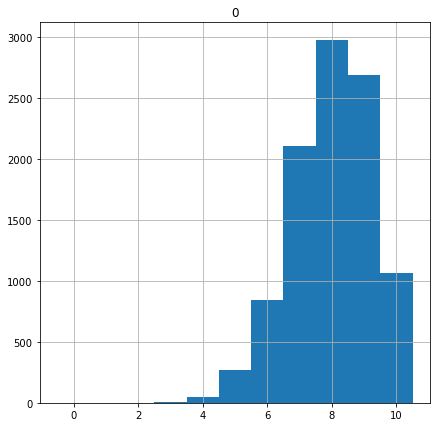

In [24]:
 fair_coin_flips=stats.binom.rvs(n=10,        #Number of flips per trial
                                p=0.8,       #Success probability
                                size=10000)  #Number of trials
print(pd.crosstab(index="counts",columns=fair_coin_flips))
pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5),bins=11);

col_0      0     1     2     3    4    5   6  7  8
row_0                                             
counts  1102  2681  3003  2011  872  264  58  7  2


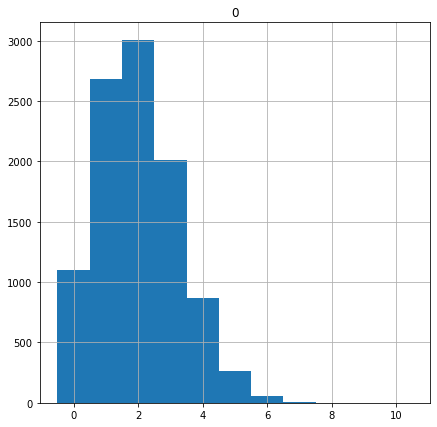

In [25]:
fair_coin_flips=stats.binom.rvs(n=10,        #Number of flips per trial
                                p=0.2,       #Success probability
                                size=10000)  #Number of trials
print(pd.crosstab(index="counts",columns=fair_coin_flips))
pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5),bins=11);

In [26]:
stats.binom.cdf(k=5,   #Probability of k=5 successes or less
               n=10,   #With 10 flips
                p=0.8) #And success probability 0.8

0.032793497599999964

In [28]:
1-stats.binom.cdf(k=8,   #Probability of k=9 successes or more
               n=10,   #With 10 flips
                p=0.8) #And success probability 0.8

0.37580963840000003

In [33]:
stats.binom.pmf(k=5,   #Probability of k=5 success 
                n=10,  #With 10 flips
                p=0.5)  #And success probability 0.5

0.24609375000000025

In [34]:
stats.binom.pmf(k=8,   #Probability of k=8 success 
                n=10,  #With 10 flips
                p=0.8)  #And success probability 0.8

0.301989888

THE GEOMETRIC AND EXPONENTIAL DISTRIBUTIONS

col_0     1     2     3    4    5    6   7   8   9   10  11  12  13  14  15
row_0                                                                      
counts  5093  2460  1249  598  295  129  91  33  25  15   3   3   3   1   2


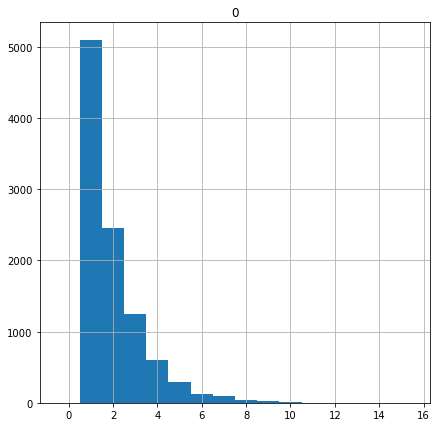

In [42]:
random.seed(12)
flips_till_heads=stats.geom.rvs(size=10000,  #Generate geometric data
                               p=0.5)        #With success probability 0.5
print(pd.crosstab(index="counts",columns=flips_till_heads))
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5)
                                  ,bins=max(flips_till_heads)+1);

In [43]:
first_five=stats.geom.cdf(k=5,   #Probability of success of first 5 flips
                          p=0.5)
1-first_five

0.03125

In [44]:
stats.geom.pmf(k=2,  #Probability of needing exactly 2 flips to get first success
              p=0.5)

0.25

In [45]:
prob1=stats.expon.cdf(x=1,scale=1)
1-prob1

0.36787944117144233

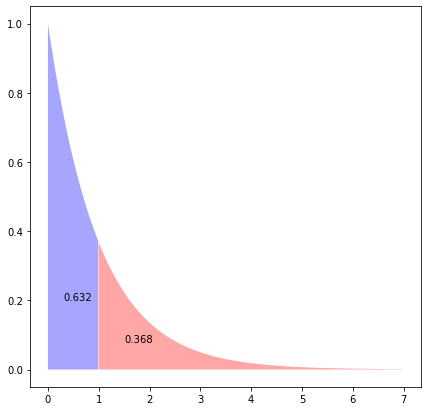

In [49]:
plt.fill_between(x=np.arange(0,1,0.01),
                y1=stats.expon.pdf(np.arange(0,1,0.01)),
                facecolor='blue',
                alpha=0.35)
plt.fill_between(x=np.arange(1,7,0.01),
                y1=stats.expon.pdf(np.arange(1,7,0.01)),
                facecolor='red',
                alpha=0.35)
plt.text(x=0.3,y=0.2,s=round(prob1,3))
plt.text(x=1.5,y=0.08,s=round(1-prob1,3));

THE POISSON DISTRIBUTION

col_0      0     1     2    3    4   5  6
row_0                                    
counts  3702  3701  1787  623  158  21  8


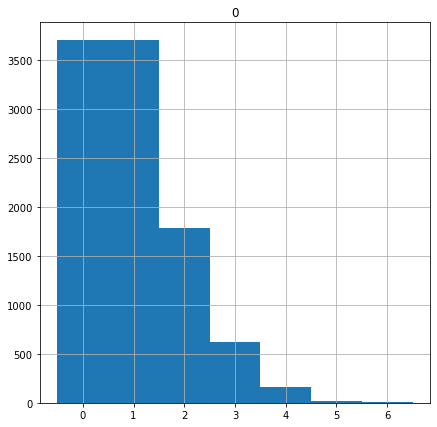

In [51]:
random.seed(12)
arrival_rate_1=stats.poisson.rvs(size=10000,  #Generate poisson data
                                mu=1)         #Average arrival time 1
print(pd.crosstab(index="counts",columns=arrival_rate_1))
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5)
                                 ,bins=max(arrival_rate_1)+1);

col_0   0   1   2   3    4    5    6    7     8     9   ...   16   17  18  19  \
row_0                                                   ...                     
counts   1   4  28  79  204  355  625  894  1115  1249  ...  225  136  73  50   

col_0   20  21  22  23  25  26  
row_0                           
counts  12   5   2   1   1   1  

[1 rows x 26 columns]


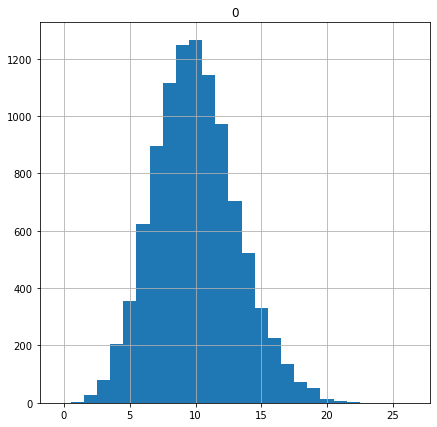

In [52]:
random.seed(12)
arrival_rate_1=stats.poisson.rvs(size=10000,  #Generate poisson data
                                mu=10)         #Average arrival time 10
print(pd.crosstab(index="counts",columns=arrival_rate_1))
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5)
                                 ,bins=max(arrival_rate_1)+1);